# **EDA COD TRENDS**

## Objectives

* Explore seasonal trends and patterns in Chemical Oxygen Demand (COD) data
* Identify how COD levels vary across months and seasons to support regulatory and process improvements.
* Investigate the relationship between COD and treatment condition variables.

## Inputs

* outputs/datasets/collection/data-melborne_f.csv

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* This notebook supports Business Requirement 1: understanding how COD fluctuates seasonally.
* Focus here is on descriptive EDA so no ML models included.
* Can be reviewed with stakeholders for feedback


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Nod-to-the-COD/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/Nod-to-the-COD'

# Import Libraries and Load Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [6]:

df = pd.read_csv(f"outputs/datasets/collection/Data-Melbourns_F_fixed.csv", parse_dates=['date'])
df.head()


,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,date
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014-01-01
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014-01-02
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014-01-05
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014-01-06
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014-01-07


## Seasonal Analysis of COD

Although I had got rid of day, month and year colums, I realise now I need to add these back in for my seasonal analysis. Also I want to create the seasonal data.

In [7]:
# Create new time-related columns
df['Month'] = df['date'].dt.month
df['Month_Name'] = df['date'].dt.strftime('%b')
df['Season'] = df['date'].dt.month % 12 // 3 + 1
df['Season'] = df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

# Sort month names for plots
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

### Boxplot - Monthly Distribution of COD
This boxplot shows the distribution of COD values across the year to help identify any seasonal fluctuations.

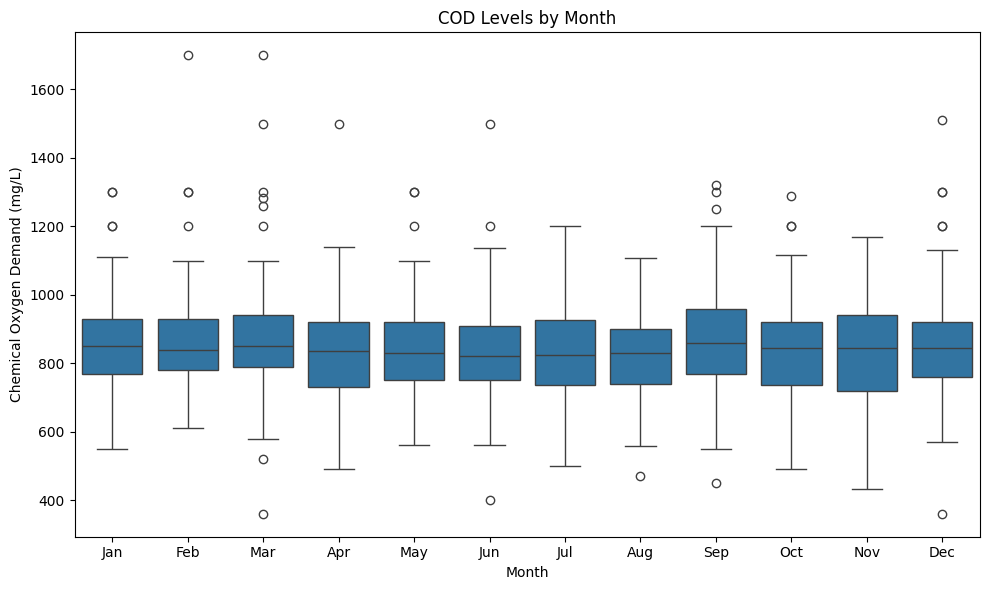

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month_Name', y='Chemical Oxygen Demand', data=df, order=month_order)
plt.title('COD Levels by Month')
plt.ylabel('Chemical Oxygen Demand (mg/L)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


##### Observation - There is little variability in COD levels across the year, though there is a small dip during the summer months, between June and August.

Now I will plot a box plot to show the seasonal distribution of COD.

### Box Plot - Seasonal Distribution of COD

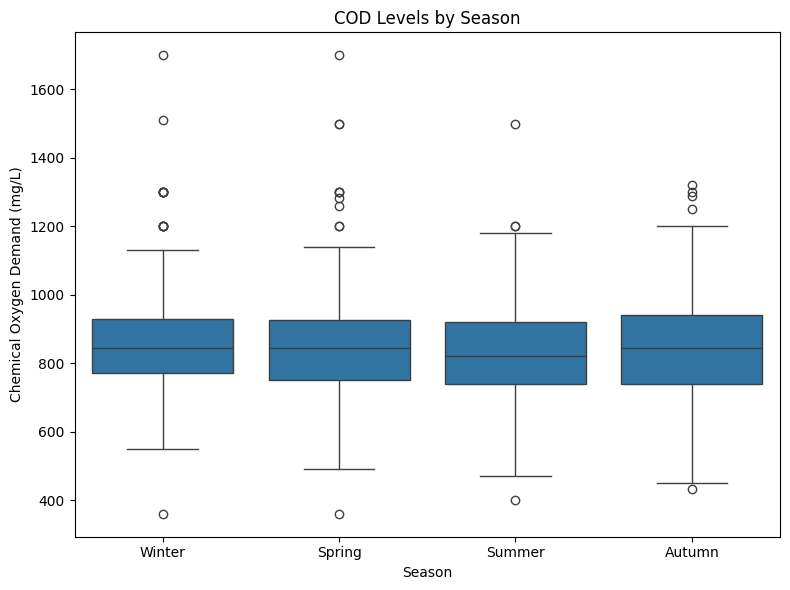

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Season', y='Chemical Oxygen Demand', data=df)
plt.title('COD Levels by Season')
plt.ylabel('Chemical Oxygen Demand (mg/L)')
plt.xlabel('Season')
plt.tight_layout()
plt.show()


##### Observation - As previously, we can see there is a small dip during the summer. There is very little variability between the other months.

This could indicate a good working process for the treament plant over the year as the levels are so consistant.

As the above analysis shows little variation, we can look at line plots as these can make the subtle trends look clearer.

### Trend Line plot - Monthly Averages of COD

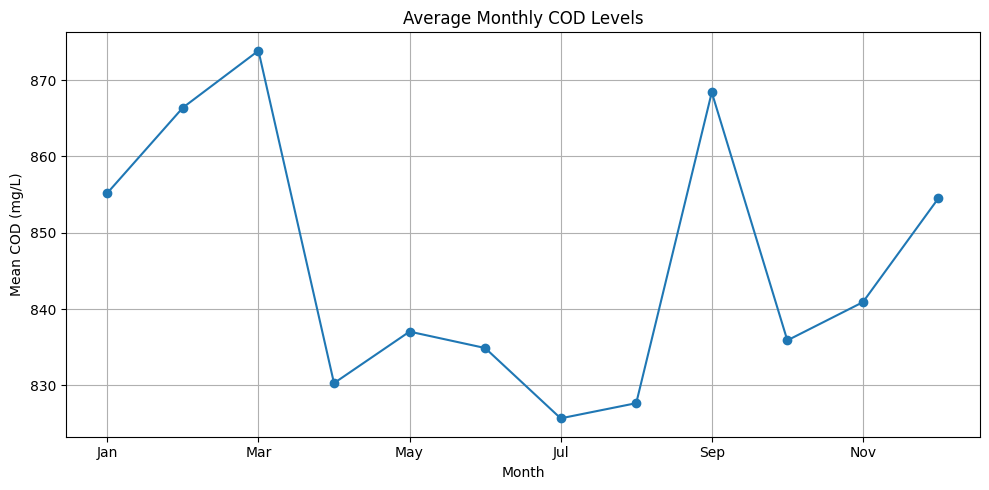

In [10]:
monthly_avg = df.groupby('Month_Name')['Chemical Oxygen Demand'].mean().reindex(month_order)

plt.figure(figsize=(10, 5))
monthly_avg.plot(marker='o')
plt.title('Average Monthly COD Levels')
plt.ylabel('Mean COD (mg/L)')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


Looking at the monthly average COD for each month on a line plot shows that there are higher COD levels in March and September, the lowest in July and August. The pattern does look as though it could be connected to the seasons.

Next, I though it would be interesting to look at the variations of COD over the year, year-on-year.

### Trend Line Plot - Year-on-Year Seasonal COD levels

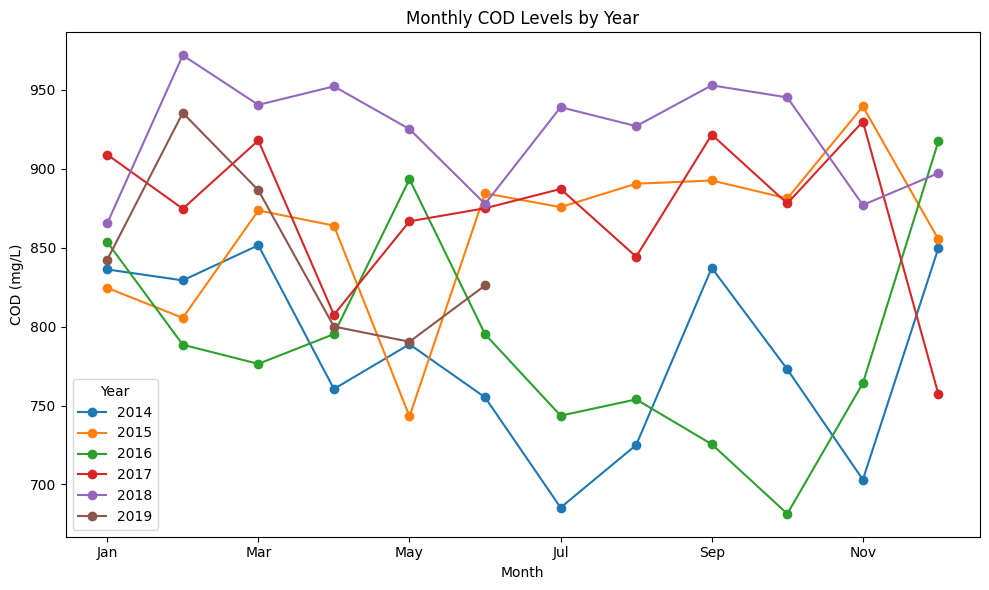

In [11]:
df['Year'] = df['date'].dt.year
pivot = df.pivot_table(index='Month_Name', columns='Year', values='Chemical Oxygen Demand')
pivot = pivot.reindex(month_order)

pivot.plot(figsize=(10, 6), marker='o')
plt.title('Monthly COD Levels by Year')
plt.ylabel('COD (mg/L)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


The above plot now shows that the seasonal pattern is inconsistent over the years.
We can see that in some years, 2017, 2018, the COD levels are consistantly high with no dip in the summer.
For 2014 and 2015 we can see the dip in the summer months.
Some of the years show more varied fluctuations while a couple of the years are more stable. There could be internal and/or external factors influencing these patterns.
This suggests, that although we earlier saw there was a hint of seasonal patterns, these can be overridden by other factors such as raw influent variability and possible operating conditions.
There is considerable variability from year to year, suggesting that not only seasonal trends can explain the fluctuating levels of COD.

---

# COD vs Treatment Condition Variables

I am using scatter plots to visually show the liner or non linear relationships between COD and the variables Ammonia, Biological Oxygen Demand, BOD and Total Nitrogen.

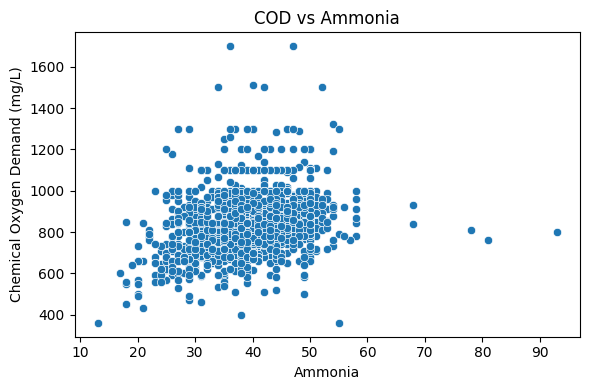

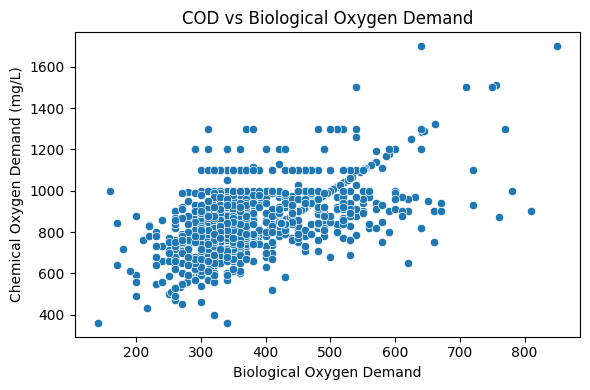

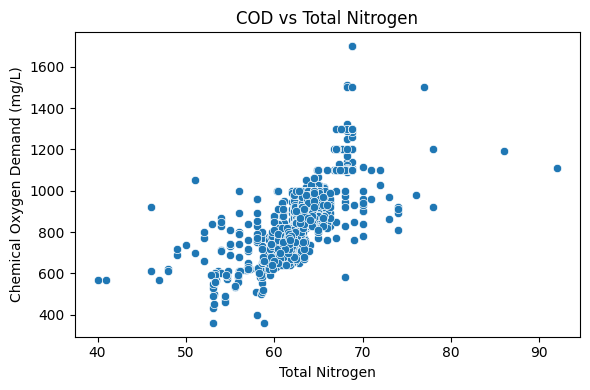

In [12]:
treatment_vars = ['Ammonia', 'Biological Oxygen Demand', 'Total Nitrogen']

for var in treatment_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=var, y='Chemical Oxygen Demand', data=df)
    plt.title(f'COD vs {var}')
    plt.xlabel(var)
    plt.ylabel('Chemical Oxygen Demand (mg/L)')
    plt.tight_layout()
    plt.show()


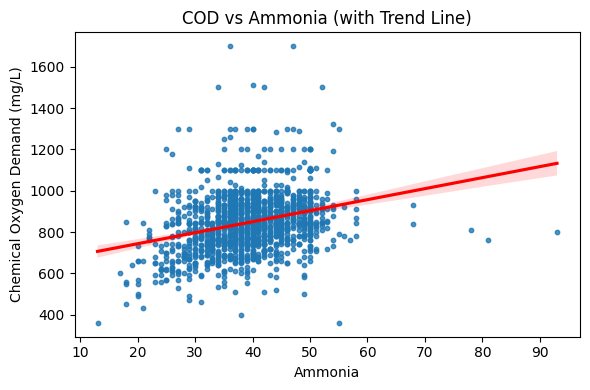

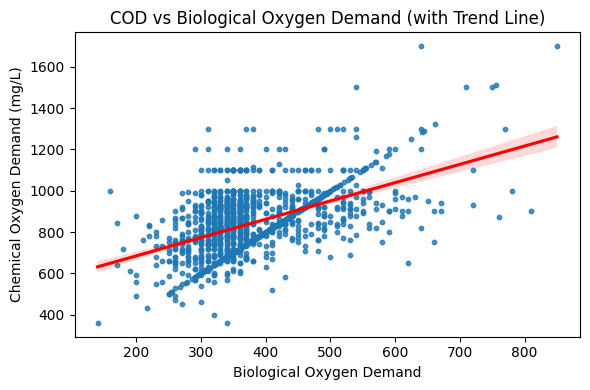

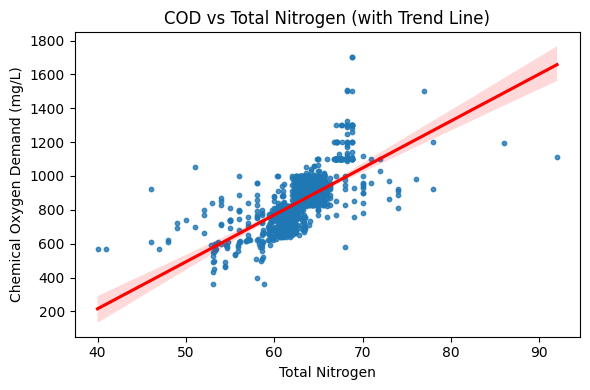

In [13]:
for var in treatment_vars:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=var, y='Chemical Oxygen Demand', data=df, scatter_kws={'s':10}, line_kws={'color': 'red'})
    plt.title(f'COD vs {var} (with Trend Line)')
    plt.xlabel(var)
    plt.ylabel('Chemical Oxygen Demand (mg/L)')
    plt.tight_layout()
    plt.show()


### COD vs Ammonia

This scatter plot illustrates the correlation between Ammonia and Chemical Oxygen Demand (COD) levels.

**Insights:**
- A moderate positive correlation exists — as Ammonia increases, COD also tends to increase.
- Most observations cluster between 25–55 mg/L of Ammonia and 600–1000 mg/L COD.
- Outliers are present, but the overall trend supports the idea that higher ammonia is associated with higher COD levels.
- However, the wide vertical spread at each Ammonia level suggests that other variables could also influence COD significantly.

This supports using Ammonia as one of several indicators in understanding and managing COD levels.

### COD vs Biological Oxygen Demand (BOD)

This scatter plot shows a clear and strong positive relationship between Biological Oxygen Demand (BOD) and Chemical Oxygen Demand (COD).

**Insights:**
- COD levels increase consistently with BOD, suggesting that both metrics track similar organic loading.
- The trend line indicates a stronger and more reliable correlation compared to Ammonia.
- Data points are densely packed between 250–450 mg/L BOD and 600–1100 mg/L COD, indicating typical operating ranges.
- This strong relationship supports using BOD as a proxy or early indicator for COD performance and compliance risk.

This is a key finding for Business Requirement 1, as it highlights BOD as a critical treatment condition influencing COD levels.

### COD vs Total Nitrogen

This scatter plot shows a strong positive linear relationship between Total Nitrogen and Chemical Oxygen Demand (COD).

**Insights:**
- COD levels rise steadily as Total Nitrogen increases, suggesting that nitrogen-rich influent is associated with higher organic loading.
- The data is tightly clustered around the trend line, indicating a strong and consistent correlation.
- This makes Total Nitrogen a key process variable to monitor when seeking to control or predict COD.
- Compared to Ammonia and BOD, Total Nitrogen has the most linear and clean relationship with COD.

This insight is valuable for both process optimisation and regulatory reporting, directly supporting Business Requirement 1.



In [14]:
df[['Chemical Oxygen Demand'] + treatment_vars].corr()


,Chemical Oxygen Demand,Ammonia,Biological Oxygen Demand,Total Nitrogen
Chemical Oxygen Demand,1.000000,0.284552,0.524189,0.681225
Ammonia,0.284552,1.000000,0.164753,0.342995
Biological Oxygen Demand,0.524189,0.164753,1.000000,0.455843
Total Nitrogen,0.681225,0.342995,0.455843,1.000000


### Correlation Summary

The table above shows Pearson correlation coefficients between COD and the treatment variables.

**Insights:**
- COD has the strongest correlation with Total Nitrogen (0.68), followed by BOD (0.52).
- Ammonia shows a weaker relationship (0.28), aligning with the more scattered trend in the scatter plot.

These results support using Total Nitrogen and BOD as key indicators for understanding and predicting COD behaviour.


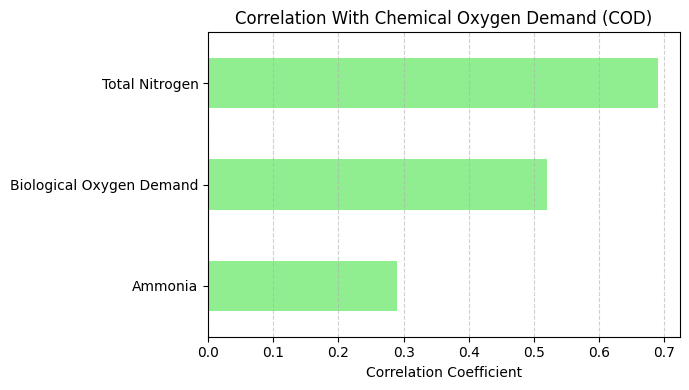

In [ ]:
cod_correlations = {
    'Ammonia': 0.29,
    'Biological Oxygen Demand': 0.52,
    'Total Nitrogen': 0.69
}

cod_corr_series = pd.Series(cod_correlations).sort_values()

plt.figure(figsize=(7, 4))
cod_corr_series.plot(kind='barh', color='lightgreen')

plt.title('Correlation With Chemical Oxygen Demand (COD)')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


---

## EDA Summary and Next Steps

This notebook explored trends in Chemical Oxygen Demand (COD) to support Business Requirement 1.

**Key Findings:**
- Seasonal fluctuations in COD are minor but detectable (lower in summer).
- Total Nitrogen and BOD show strong relationships with COD and should be prioritised in monitoring.
- Ammonia is moderately correlated and may have a secondary role.

These findings provide a solid foundation for feature selection in modelling, and offer clear business insights into regulatory and operational planning.

Next Step: Proceed to model development (regression/classification) in a dedicated notebook.
